In [21]:
#La línea %matplotlib inline es un comando que configura la salida de graficos
#para que se muestren dentro del notebook en lugar de en una ventana emergente
%matplotlib inline

#Importamos la libreria Numpy la cual nos proporciona herramientas para 
#el cálculo numérico y otras operaciones.
import numpy as np

#Importamos la libreria Pandas que nos proporciona estructuras de datos 
#y funciones para su análisis.
import pandas as pd

#Importamos la libreria Matplotlib la cual nos sirve para poder crear y 
#visualizar datos con alias como plt.
import matplotlib.pyplot as plt


In [22]:
#Esta línea asigna el contenido del archivo csv al objeto "people".
people = pd.read_csv('20220601-LGBTQ-character-demographics-v3.csv')

In [23]:
#Mostramos en forma de tabla el objeto "people" para ver si el contenido 
#esta correctamente estructurado
people

,ID,show_title,confirmation_date,character_name,race,gender,orientation,role,representation
0,tt7736544,3Below: Tales of Arcadia,7/12/2019,Shannon Longhannon,Blanco,Mujer Cis,Lesbiana,Personaje Recurrente,Explícito
1,tt1305826,Adventure Time,5/17/2010,Princess Bubblegum,NaN,Mujer Cis,Indeterminado,Personaje Recurrente,Explícito
2,tt1305826,Adventure Time,4/5/2010,Marceline the Vampire Queen,NaN,Mujer Cis,Indeterminado,Personaje Recurrente,Explícito
3,tt1305826,Adventure Time,4/26/2010,BMO,NaN,Agénero,Indeterminado,Personaje Recurrente,Explícito
4,tt11165358,Adventure Time: Distant Lands,6/25/2020,Y5,NaN,Mujer Cis,Ambiguo,Personaje Recurrente,Implícito
...,...,...,...,...,...,...,...,...,...
348,tt1641384,Young Justice,6/2/2012,Bart Allen,Blanco,Hombre Cis,Gay,Personaje Recurrente,Explícito
349,tt1641384,Young Justice,5/26/2012,Ed Dorado Jr.,POC,Hombre Cis,Gay,Personaje Recurrente,Implícito
350,tt1641384,Young Justice,11/26/2010,Marie Logan,Blanco,Mujer Cis,Lesbiana,Personaje Invitado,Implícito
351,tt1641384,Young Justice,1/25/2019,Harper Row,Blanco,Mujer Cis,Bisexual,Personaje Invitado,Implícito


In [24]:
#Hacemos una prueba mostrando las columnas/categorias del csv, 
#la cual más adelante nos facilitará la manipulación de datos.
print(people.columns)

Index(['ID', 'show_title', 'confirmation_date', 'character_name', 'race',
       'gender', 'orientation', 'role', 'representation'],
      dtype='object')


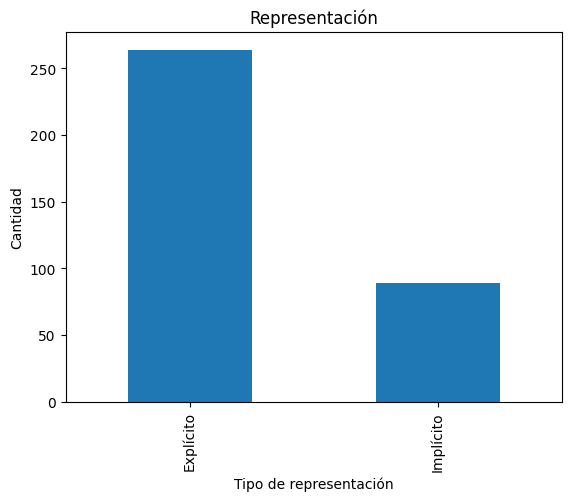

In [25]:
#Esta linea cuenta la frecuencia de cada valor único de la columna 
#"representation" y devuelve un grafico con la cantidad de personajes 
#según su representación.
#Con el .plot(kind=bar) crea un grafico de barras a partir de la 
#cuenta hecha anteriormente.
people['representation'].value_counts().plot(kind='bar')


#Añade un título a la grafica.
plt.title('Representación')

#Añade una descripción para los tipos.
plt.xlabel('Tipo de representación')

#Añade una descripción para la cantidad.
plt.ylabel('Cantidad')

#Muestra el grafico generado.
plt.show()

In [26]:
#Contamos la fecuencia con la que aparece cada genero en el csv.
people["gender"].value_counts()

Hombre Cis       168
Mujer Cis        131
No Binario        20
Mujer Trans       16
Agénero            6
Género Fluido      5
Indeterminado      3
Hombre Trans       3
Intersexual        1
Name: gender, dtype: int64

In [27]:
#Usando una función de numpy (np.unique), guardamos en dos array la 
#cantidad de cada genero que hay ordenados alfabéticamente.
arr = np.unique(people["gender"], return_counts=1)

In [28]:
#Guardamos cada uno de los dos arrays en un objeto diferente transformandolo
#a una lista con la función .tolist().
labelsPersones = arr[0].tolist()
numbersPersones = arr[1].tolist()

#creamos una variable contador de la cantidad que iniciamos en 0.
sumNumbersPersones = 0

In [29]:
#Usamos un bucle for para contar cuantos registros hay y así poder tener
#los porcentajes más adelante.
for i in numbersPersones:
    sumNumbersPersones += i

In [30]:
#Creamos el array "percentPersones".
percentPersones = []

#Usamos un bucle for para guardar los % de cada genero en el array 
#creado, usando el formado decidido (2 decimales, "numero" + '%').
for j in numbersPersones:
    percent = "{:.2f}".format((j/sumNumbersPersones)*100)
    percentPersones.append(str(percent)+"%")

#Mostramos los porcentajes.
percentPersones

['1.70%',
 '1.42%',
 '47.59%',
 '0.85%',
 '0.85%',
 '0.28%',
 '37.11%',
 '4.53%',
 '5.67%']

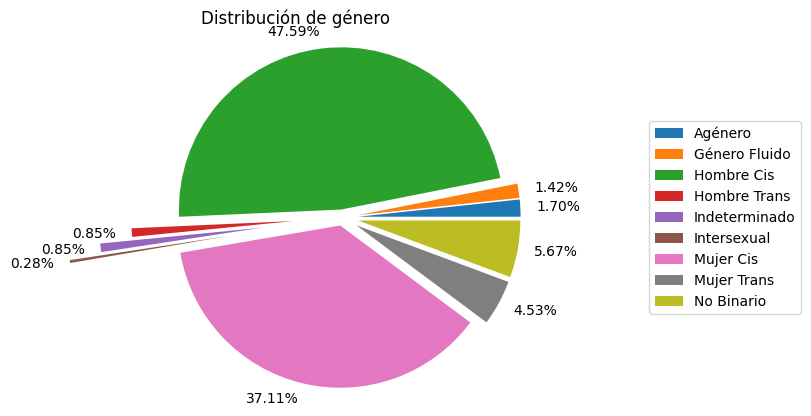

In [31]:
#Creamos una tupla con un conjunto de ejes para posteriormente 
#usarlos en el grafico.
figura1, ax1 = plt.subplots()

#Definimos la expansión que va a tener cada categoria referente al centro
explode = (0.1, 0.1, 0.05, 0.3, 0.5, 0.7, 0.05, 0.1, 0.1)

#Creamos el grafico de tipo pie añadiendo la expansion mostrada 
#antes y añadiendo los porcentajes alrededor de cada categoría.
ax1.pie(numbersPersones, explode=explode, labels=percentPersones)

#Establecemos los límites del gráfico para que los ejes XY sean iguales.
ax1.axis("equal")

#Añadimos un recuadro a la derecha con los nombres de cada categoría.
ax1.legend(labelsPersones, bbox_to_anchor=(1.2, 0.5), loc='center left')

#Añadimos un título al gráfico.
plt.title('Distribución de género')

#Mostramos el gráfico.
plt.show()

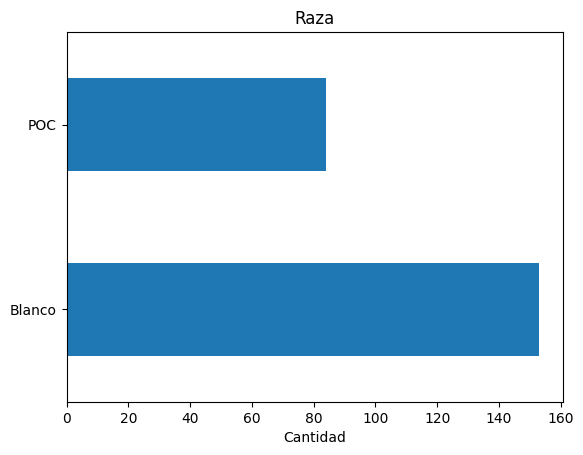

In [32]:
#Contamos la columan de raza y la mostramos en un grafico.
people['race'].value_counts().plot(kind='barh')

#Añadimos un titulo.
plt.title('Raza')

#Añadimos una descripción para la cantidad.
plt.xlabel('Cantidad')

#Mostramos el gráfico.
plt.show()

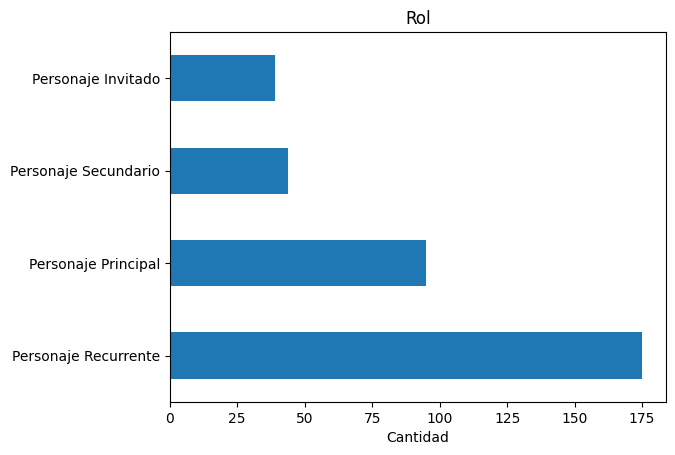

In [33]:
#Contamos la columan de rol y la mostramos en un grafico.
people['role'].value_counts().plot(kind='barh')

#Añadimos un título.
plt.title('Rol')

#Añadimos una descripción para la cantidad.
plt.xlabel('Cantidad')

#Mostramos el gráfico.
plt.show()

In [34]:
#Contamos la fecuencia con la que aparece cada orientación en el csv.
people["orientation"].value_counts()

Gay              121
Lesbiana          82
Indeterminado     59
Bisexual          52
Queer             18
Pansexual         11
Asexual            6
Poliamoroso        2
Ambiguo            1
Heterosexual       1
Name: orientation, dtype: int64

In [35]:
#Usando una función de numpy (np.unique), guardamos en dos array la 
#cantidad de cada orientación que hay ordenados alfabéticamente.
arrOrient = np.unique(people["orientation"], return_counts=1)

In [36]:
#Mostramos el array para ver que este todo correcto.
arrOrient
#Si ponemos el indicador [0] o [1] mostraremos solo 1 de los 2 arrays.

(array(['Ambiguo', 'Asexual', 'Bisexual', 'Gay', 'Heterosexual',
        'Indeterminado', 'Lesbiana', 'Pansexual', 'Poliamoroso', 'Queer'],
       dtype=object),
 array([  1,   6,  52, 121,   1,  59,  82,  11,   2,  18], dtype=int64))

In [37]:
#Guardamos cada uno de los dos arrays en un objeto diferente transformandolo
#a una lista con la función .tolist().
labelsOrientacion = arrOrient[0].tolist()
numbersOrientacion = arrOrient[1].tolist()

#creamos una variable contador de la cantidad que iniciamos en 0.
sumNumbersOrienta = 0

In [38]:
#Usamos un bucle for para contar cuantos registros hay y así poder tener
#los porcentajes más adelante.
for n in numbersOrientacion:
    sumNumbersOrienta += n

In [39]:
#Creamos el array "percentOrientacion".
percentOrientacion = []

#Usamos un bucle for para guardar los % de cada orientación en el array 
#creado, usando el formado decidido (2 decimales, "numero" + '%').
for m in numbersOrientacion:
    percent = "{:.2f}".format((m/sumNumbersOrienta)*100)
    percentOrientacion.append(str(percent)+"%")

#Mostramos los porcentajes.
percentOrientacion

['0.28%',
 '1.70%',
 '14.73%',
 '34.28%',
 '0.28%',
 '16.71%',
 '23.23%',
 '3.12%',
 '0.57%',
 '5.10%']

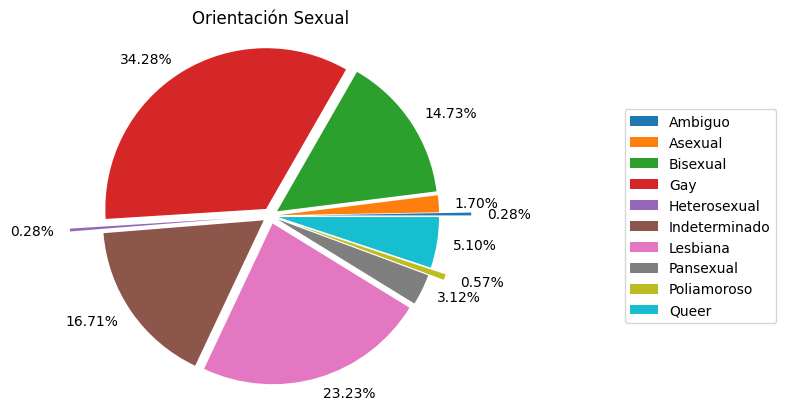

In [40]:
#Creamos una tupla con un conjunto de ejes para posteriormente 
#usarlos en el grafico.
figura1, ax1 = plt.subplots()

#Definimos la expansión que va a tener cada categoria referente al centro
explode = (0.25, 0.05, 0.05, 0.05, 0.25, 0.05, 0.05, 0.05, 0.15, 0.05)

#Creamos el grafico de tipo pie añadiendo la expansion mostrada 
#antes y añadiendo los porcentajes alrededor de cada categoría.
ax1.pie(numbersOrientacion, explode=explode, labels=percentOrientacion)

#Establecemos los límites del gráfico para que los ejes XY sean iguales.
ax1.axis("equal")

#Añadimos un recuadro a la derecha con los nombres de cada categoría.
ax1.legend(labelsOrientacion, bbox_to_anchor=(1.2, 0.5), loc='center left')

#Añadimos un título al gráfico.
plt.title('Orientación Sexual')

#Mostramos el gráfico.
plt.show()

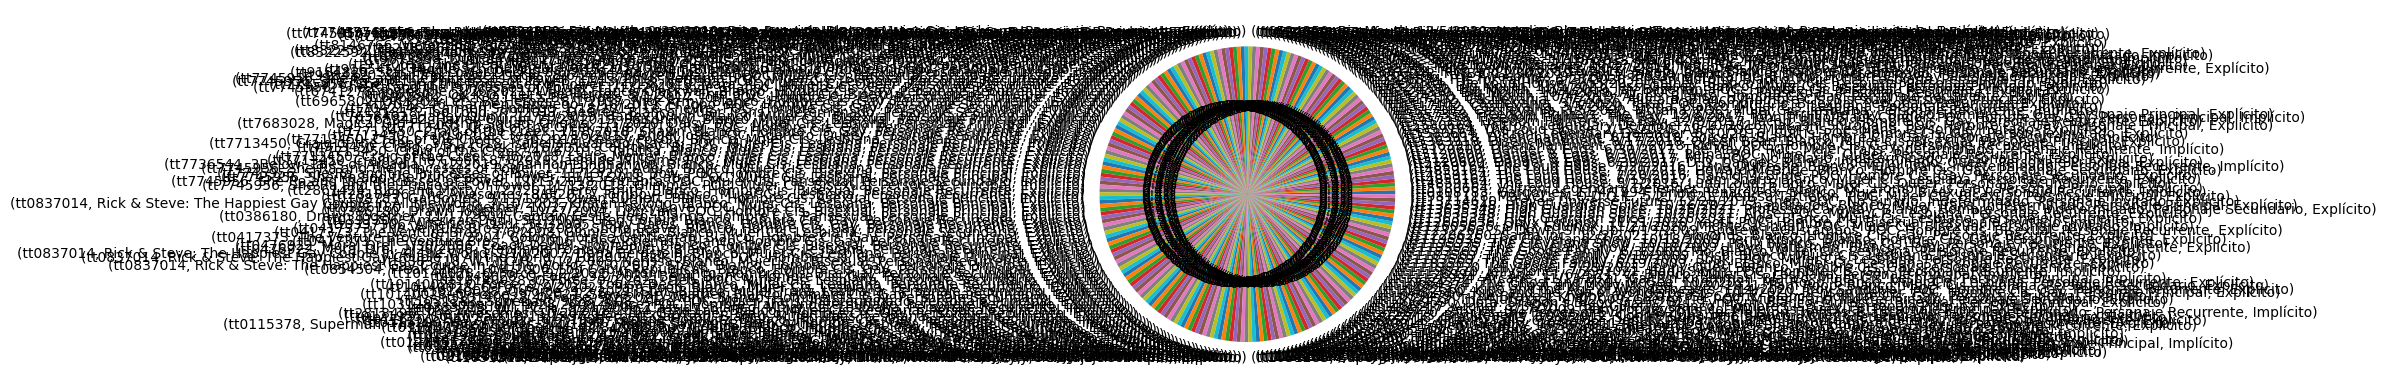

In [44]:
#Esto esta to guapo, x eso lo he dejado :).
people.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()